In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
from plotly.io import write_html
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import statsmodels.api as sm
import os

## Figure 9: Changes in Real WBA amounts between AWW WBA Max Indexers vs. Non-Indexers from 2003-2023

In [146]:
master = pd.read_csv("master.csv")
indexers_list = ['AR', 'CO', 'CT', 'DC', 'HI', 'IA', 'ID', 'IL', 'KS', 'KY', 'LA', 'MA', 'ME', 'MN', 'MT', 'NC', 'ND', 'NJ', 'NM', 'NV', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TX', 'UT', 'VT', 'WA', 'WV', 'WY']
nonindexers_list = ['AK', 'AL', 'AZ', 'CA', 'DE', 'FL', 'GA', 'IN', 'MD', 'MI', 'MO', 'MS', 'NH', 'NY', 'TN', 'VA', 'WI']

In [147]:
master.columns

Index(['Unnamed: 0', 'Year', 'State', 'Replacement Ratio 1',
       'Replacement Ratio 2', 'Recipiency Rate', 'Average WBA', 'Minimum WBA',
       'Maximum WBA', 'Average Weekly Wage', 'Region', 'Annual Regional CPI-U',
       'Annualized State Inflation Rate', 'MET',
       'Real Average WBA (regional, 2000 base)',
       'Real Minimum WBA (regional, 2000 base)',
       'Real Maximum WBA (regional, 2000 base)',
       'Real Average WBA (state, 2000 base)',
       'Real Minimum WBA (state, 2000 base)',
       'Real Maximum WBA (state, 2000 base)',
       'Real Average WBA (regional, 2023 base)',
       'Real Minimum WBA (regional, 2023 base)',
       'Real Maximum WBA (regional, 2023 base)',
       'Real Average WBA (state, 2017 base)',
       'Real Minimum WBA (state, 2017 base)',
       'Real Maximum WBA (state, 2017 base)'],
      dtype='object')

In [148]:
master = master[master['Year'] >= 2003]
indexers = master[master['State'].isin(indexers_list)]
nonindexers = master[master['State'].isin(nonindexers_list)]

In [149]:
indexers.to_csv("indexers.csv")

In [150]:
nonindexers.to_csv("nonindexers.csv")

In [151]:
avg_indexers = indexers.groupby(['Year'])[['Real Average WBA (regional, 2023 base)',
                           'Real Maximum WBA (regional, 2023 base)']].aggregate('mean').round(2)

In [152]:
avg_nonindexers = nonindexers.groupby(['Year'])[['Real Average WBA (regional, 2023 base)',
                           'Real Maximum WBA (regional, 2023 base)']].aggregate('mean').round(2)

In [153]:
avg_indexers = avg_indexers.reset_index()
avg_indexers = avg_indexers.reset_index()
avg_indexers['Real Average WBA (regional, 2023 base)'] = (avg_indexers['Real Average WBA (regional, 2023 base)'] - 431.20) / 431.20 * 100
avg_indexers['Real Maximum WBA (regional, 2023 base)'] = (avg_indexers['Real Maximum WBA (regional, 2023 base)'] - 573.58) / 573.58 * 100
avg_indexers

,index,Year,"Real Average WBA (regional, 2023 base)","Real Maximum WBA (regional, 2023 base)"
0,0,2003,0.000000,0.000000
1,1,2004,-3.810297,-0.498623
2,2,2005,-4.246289,-0.754908
3,3,2006,-4.090909,-0.697374
4,4,2007,-3.172542,0.191778
5,5,2008,-2.342301,0.688657
6,6,2009,3.172542,3.610656
7,7,2010,0.204082,4.330695
8,8,2011,-4.526902,0.667736
9,9,2012,-4.448052,0.744447


In [154]:
avg_nonindexers = avg_nonindexers.reset_index()
avg_nonindexers = avg_nonindexers.reset_index()
avg_nonindexers['Real Average WBA (regional, 2023 base)'] = (avg_nonindexers['Real Average WBA (regional, 2023 base)'] - 393.39) / 393.39 * 100
avg_nonindexers['Real Maximum WBA (regional, 2023 base)'] = (avg_nonindexers['Real Maximum WBA (regional, 2023 base)'] - 494.01) / 494.01 * 100
avg_nonindexers

,index,Year,"Real Average WBA (regional, 2023 base)","Real Maximum WBA (regional, 2023 base)"
0,0,2003,0.000000,0.000000
1,1,2004,-3.985866,-1.271229
2,2,2005,-4.860317,-2.311694
3,3,2006,-5.689011,-3.803567
4,4,2007,-6.469407,-5.228639
5,5,2008,-6.972724,-6.192182
6,6,2009,-2.877552,-2.433149
7,7,2010,-6.189786,-3.287383
8,8,2011,-10.249371,-5.981660
9,9,2012,-11.934721,-7.894577


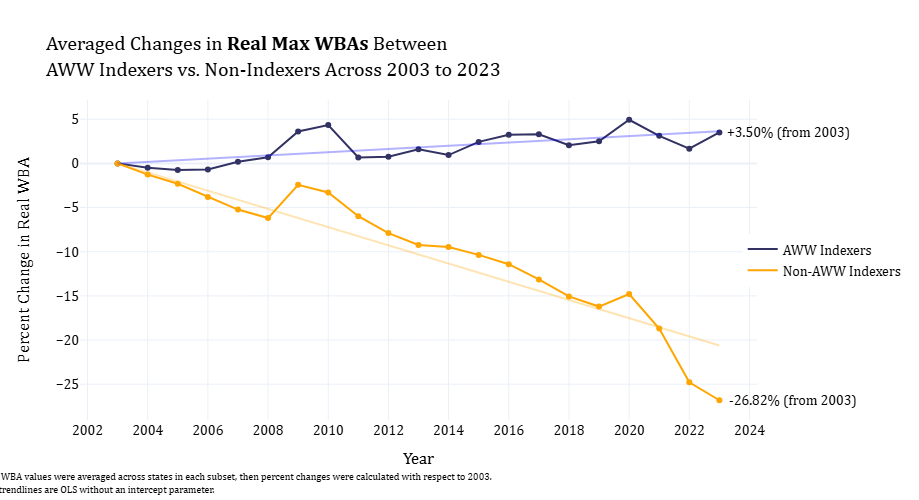

In [155]:
pio.templates.default = 'plotly_white'

X = avg_indexers["index"]
y = avg_indexers["Real Maximum WBA (regional, 2023 base)"]

X_reshaped = X.values.reshape(-1, 1)
model = sm.OLS(y, X, hasconst=False).fit()

x_pred = np.linspace(X.min(), X.max(), 100)
y_pred = model.predict(x_pred)
x_pred = x_pred + 2003

X = avg_nonindexers["index"]
y = avg_nonindexers["Real Maximum WBA (regional, 2023 base)"]

X_reshaped = X.values.reshape(-1, 1)
model = sm.OLS(y, X, hasconst=False).fit()

x_pred2 = np.linspace(X.min(), X.max(), 100)
y_pred2 = model.predict(x_pred2)
x_pred2 = x_pred2 + 2003

fig3 = px.line(data_frame = avg_indexers, 
             x = "Year", 
             y = "Real Maximum WBA (regional, 2023 base)")
fig3.update_traces(line=dict(color = 'rgba(50,50,100,1)'), name="AWW Indexers", showlegend=True)

fig4= px.scatter(data_frame = avg_indexers, 
                x = "Year", 
                y = "Real Maximum WBA (regional, 2023 base)",
                color_discrete_sequence=["rgb(50,50,100)"])

fig7 = px.line(data_frame = avg_nonindexers, 
             x = "Year", 
             y = "Real Maximum WBA (regional, 2023 base)")
fig7.update_traces(line=dict(color = 'rgba(255, 165, 0,1)'), name="Non-AWW Indexers", showlegend=True)

fig8= px.scatter(data_frame = avg_nonindexers, 
                x = "Year", 
                y = "Real Maximum WBA (regional, 2023 base)",
                color_discrete_sequence=["rgb(255, 165, 0)"])

fig3 = go.Figure(data= fig3.data + fig4.data + fig7.data + fig8.data)

fig3.add_trace(go.Scatter(
    x=x_pred,
    y=y_pred,
    mode='lines',
    line=dict(color='blue', width=2),
    opacity=0.3,
    showlegend=False
))
fig3.add_trace(go.Scatter(
    x=x_pred2,
    y=y_pred2,
    mode='lines',
    line=dict(color='orange', width=2),
    opacity=0.3,
    showlegend=False
))


fig3.update_layout(title_text="Averaged Changes in <b>Real Max WBAs</b> Between<br>AWW Indexers vs. Non-Indexers Across 2003 to 2023",
                   xaxis_title="Year", yaxis_title="Percent Change in Real WBA",
                   height=500,
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   xaxis=dict(
                        tickmode='linear',   
                        tick0=2000,          
                        dtick=2              
                    ),
                   yaxis=dict(
                        tick0=0,          
                        dtick=5
                    ),
                   legend=dict(
                        orientation="v",     
                        x=1.1,
                        xanchor="center",
                        y=0.5
                    )
                  )
fig3.add_annotation(
    xref="paper", yref="paper",
    x=1.14, y=0.93,
    text="+3.50% (from 2003)",
    showarrow=False,
    font=dict(size=14, color="black"),
    align="left"
)
fig3.add_annotation(
    xref="paper", yref="paper",
    x=1.15, y=0.03,
    text="-26.82% (from 2003)",
    showarrow=False,
    font=dict(size=14, color="black"),
    align="left"
)
fig3.add_annotation(
    text='Real WBA values were averaged across states in each subset, then percent changes were calculated with respect to 2003.<br>The trendlines are OLS without an intercept parameter.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.15,
    y=-0.15,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)

In [160]:
write_html(fig3, 'fig_9a.html')

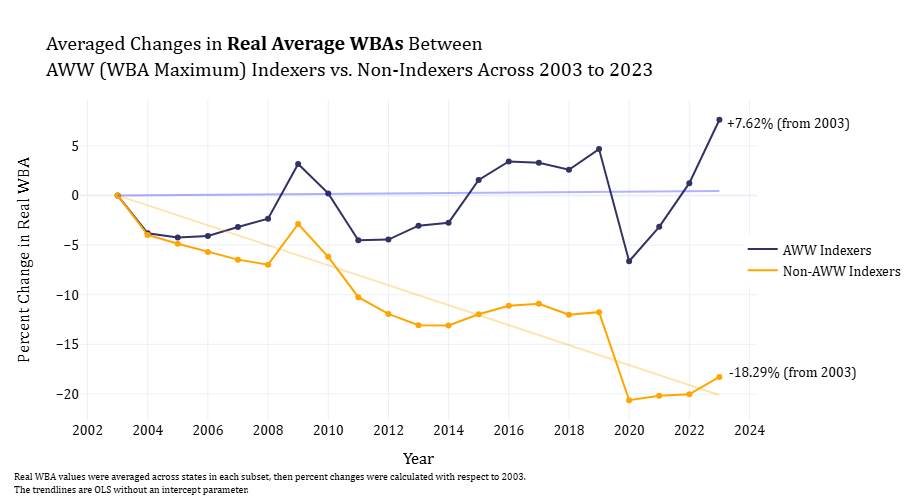

In [156]:
X = avg_indexers["index"]
y = avg_indexers["Real Average WBA (regional, 2023 base)"]

X_reshaped = X.values.reshape(-1, 1)
model = sm.OLS(y, X, hasconst=False).fit()

x_pred = np.linspace(X.min(), X.max(), 100)
y_pred = model.predict(x_pred)
x_pred = x_pred + 2003

X = avg_nonindexers["index"]
y = avg_nonindexers["Real Average WBA (regional, 2023 base)"]

X_reshaped = X.values.reshape(-1, 1)
model = sm.OLS(y, X, hasconst=False).fit()

x_pred2 = np.linspace(X.min(), X.max(), 100)
y_pred2 = model.predict(x_pred2)
x_pred2 = x_pred2 + 2003

fig1 = px.line(data_frame = avg_indexers, 
             x = "Year", 
             y = "Real Average WBA (regional, 2023 base)",
              )
fig1.update_traces(line=dict(color = 'rgba(50, 50, 100,1)'), name="AWW Indexers", showlegend=True)

fig2 = px.scatter(data_frame = avg_indexers, 
                x = "Year", 
                y = "Real Average WBA (regional, 2023 base)",
                color_discrete_sequence=["rgb(50,50,100)"])

fig5 = px.line(data_frame = avg_nonindexers, 
             x = "Year", 
             y = "Real Average WBA (regional, 2023 base)",
              )
fig5.update_traces(line=dict(color = 'rgba(255, 165, 0,1)'), name="Non-AWW Indexers", showlegend=True)

fig6 = px.scatter(data_frame = avg_nonindexers, 
                x = "Year", 
                y = "Real Average WBA (regional, 2023 base)",
                color_discrete_sequence=["rgb(255, 165, 0)"])

fig1 = go.Figure(data= fig1.data + fig2.data + fig5.data + fig6.data)

fig1.add_trace(go.Scatter(
    x=x_pred,
    y=y_pred,
    mode='lines',
    line=dict(color='blue', width=2),
    opacity=0.3,
    showlegend=False
))
fig1.add_trace(go.Scatter(
    x=x_pred2,
    y=y_pred2,
    mode='lines',
    line=dict(color='orange', width=2),
    opacity=0.3,
    showlegend=False
))
fig1.update_layout(title_text="Averaged Changes in <b>Real Average WBAs</b> Between<br>AWW (WBA Maximum) Indexers vs. Non-Indexers Across 2003 to 2023",
                   xaxis_title="Year", yaxis_title="Percent Change in Real WBA",
                   height=500,
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    ),
                   xaxis=dict(
                        tickmode='linear',   
                        tick0=2000,          
                        dtick=2              
                    ),
                   yaxis=dict(
                        tick0=0,          
                        dtick=5 
                    ),
                   legend=dict(
                        orientation="v",     
                        x=1.1,
                        xanchor="center",
                        y=0.5
                    )
                  )

fig1.add_annotation(
    xref="paper", yref="paper",
    x=1.14, y=0.96,
    text="+7.62% (from 2003)",
    showarrow=False,
    font=dict(size=14, color="black"),
    align="left"
)
fig1.add_annotation(
    xref="paper", yref="paper",
    x=1.15, y=0.12,
    text="-18.29% (from 2003)",
    showarrow=False,
    font=dict(size=14, color="black"),
    align="left"
)
fig1.add_annotation(
    text='Real WBA values were averaged across states in each subset, then percent changes were calculated with respect to 2003.<br>The trendlines are OLS without an intercept parameter.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.15,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)

In [161]:
write_html(fig1, "fig_9b.html")

## Figure 6: Re-running Regression of Change in Recipiency Rate against Percent Change in Real WBA, **weighted by size of state labor force**

In [23]:
#os.chdir(r'C:\Users\darkf\OneDrive\Documents\GitHub\UI-Inflation')
#laborforce = pd.read_csv("laborforce.csv")


In [26]:
laborforce = laborforce[laborforce['State'] != "VI"]
laborforce['Civilian Labor Force(000)'] = laborforce['Civilian Labor Force(000)'].str.replace(',', '', regex=False).astype(int)
laborforce.to_csv('laborforce.csv', index=False)

In [35]:
avg_laborforce = (laborforce.groupby("State")['Civilian Labor Force(000)'].apply('mean') * 1000).round()
len(avg_laborforce)

52

In [37]:
percent_changes = pd.read_csv("percent_changes.csv")
percent_changes.head()

,Unnamed: 0,State,Change in Recipiency Rate (2000-2023),% Change in Recipiency Rate (2000-2023),Change in Real Average WBA (2000-2023),Change in Real Maximum WBA (2000-2023),% Change in Real Average WBA (2000-2023),% Change in Real Maximum WBA (2000-2023),% Change in Real Minimum WBA (2000-2023),Change in Recipiency Rate (2001-2023),...,% Change in Real Average WBA (2017-2023),% Change in Real Maximum WBA (2017-2023),% Change in Real Minimum WBA (2017-2023),Change in Recipiency Rate (2018-2023),% Change in Recipiency Rate (2018-2023),Change in Real Average WBA (2018-2023),Change in Real Maximum WBA (2018-2023),% Change in Real Average WBA (2018-2023),% Change in Real Maximum WBA (2018-2023),% Change in Real Minimum WBA (2018-2023)
0,0,AK,-35.127071,-57.698873,-16.58,-48.28,-9.836260,-19.467742,-31.295455,-34.688606,...,-13.652633,-21.336012,-21.337497,-7.711410,-23.043667,-13.36,-45.95,-8.080319,-18.703952,-18.692846
1,1,AL,-12.997964,-44.500523,-22.64,-34.88,-13.793944,-18.357895,-43.600000,-18.606607,...,-10.776895,-16.865856,-19.911644,-2.678461,-14.179960,-13.97,-27.42,-8.986234,-15.021365,-18.129032
2,2,AR,-24.383506,-53.772333,-37.67,-54.61,-17.810875,-17.673139,-16.927273,-36.687743,...,-11.229701,-19.892304,-19.884271,-3.622715,-14.735449,-13.77,-56.26,-7.340085,-18.110414,-18.103603
3,3,AZ,-2.452821,-11.923732,-8.74,-32.27,-4.956615,-15.741463,191.475000,-8.457287,...,6.217518,4.881899,34.848485,2.383332,15.146920,12.72,13.38,8.213340,8.396611,7.071356
4,4,CA,1.377678,3.361902,43.93,12.90,26.843874,5.608696,-46.025000,-4.154545,...,-9.409095,-21.338126,-21.347905,2.233244,5.565918,-21.03,-55.89,-9.199073,-18.705445,-18.712349


In [40]:
pct_changes_laborforce = percent_changes.merge(avg_laborforce, on="State", how='left')
pct_changes_laborforce = pct_changes_laborforce.rename(columns={'Civilian Labor Force(000)': 'Civilian Labor Force'})
pct_changes_laborforce.head()

,Unnamed: 0,State,Change in Recipiency Rate (2000-2023),% Change in Recipiency Rate (2000-2023),Change in Real Average WBA (2000-2023),Change in Real Maximum WBA (2000-2023),% Change in Real Average WBA (2000-2023),% Change in Real Maximum WBA (2000-2023),% Change in Real Minimum WBA (2000-2023),Change in Recipiency Rate (2001-2023),...,% Change in Real Maximum WBA (2017-2023),% Change in Real Minimum WBA (2017-2023),Change in Recipiency Rate (2018-2023),% Change in Recipiency Rate (2018-2023),Change in Real Average WBA (2018-2023),Change in Real Maximum WBA (2018-2023),% Change in Real Average WBA (2018-2023),% Change in Real Maximum WBA (2018-2023),% Change in Real Minimum WBA (2018-2023),Civilian Labor Force
0,0,AK,-35.127071,-57.698873,-16.58,-48.28,-9.836260,-19.467742,-31.295455,-34.688606,...,-21.336012,-21.337497,-7.711410,-23.043667,-13.36,-45.95,-8.080319,-18.703952,-18.692846,354655.0
1,1,AL,-12.997964,-44.500523,-22.64,-34.88,-13.793944,-18.357895,-43.600000,-18.606607,...,-16.865856,-19.911644,-2.678461,-14.179960,-13.97,-27.42,-8.986234,-15.021365,-18.129032,2196500.0
2,2,AR,-24.383506,-53.772333,-37.67,-54.61,-17.810875,-17.673139,-16.927273,-36.687743,...,-19.892304,-19.884271,-3.622715,-14.735449,-13.77,-56.26,-7.340085,-18.110414,-18.103603,1342190.0
3,3,AZ,-2.452821,-11.923732,-8.74,-32.27,-4.956615,-15.741463,191.475000,-8.457287,...,4.881899,34.848485,2.383332,15.146920,12.72,13.38,8.213340,8.396611,7.071356,3176321.0
4,4,CA,1.377678,3.361902,43.93,12.90,26.843874,5.608696,-46.025000,-4.154545,...,-21.338126,-21.347905,2.233244,5.565918,-21.03,-55.89,-9.199073,-18.705445,-18.712349,18515964.0


### Elasticity like relationship

In [128]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = sm.add_constant(pct_changes_laborforce['% Change in Real Average WBA (2003-2023)'])
y = pct_changes_laborforce['% Change in Recipiency Rate (2003-2023)']
w = pct_changes_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

# Summary
print(model.summary())
r_squared_avg = model.rsquared
slope_avg = model.params[1]

                                       WLS Regression Results                                      
Dep. Variable:     % Change in Recipiency Rate (2003-2023)   R-squared:                       0.172
Model:                                                 WLS   Adj. R-squared:                  0.156
Method:                                      Least Squares   F-statistic:                     10.40
Date:                                     Sun, 18 May 2025   Prob (F-statistic):            0.00222
Time:                                             23:06:49   Log-Likelihood:                -244.88
No. Observations:                                       52   AIC:                             493.8
Df Residuals:                                           50   BIC:                             497.7
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


In [129]:
X = sm.add_constant(pct_changes_laborforce[['% Change in Real Maximum WBA (2003-2023)']])
y = pct_changes_laborforce['% Change in Recipiency Rate (2003-2023)']
w = pct_changes_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

# Summary
print(model.summary())
r_squared_max = model.rsquared
slope_max = model.params[1]

                                       WLS Regression Results                                      
Dep. Variable:     % Change in Recipiency Rate (2003-2023)   R-squared:                       0.062
Model:                                                 WLS   Adj. R-squared:                  0.044
Method:                                      Least Squares   F-statistic:                     3.332
Date:                                     Sun, 18 May 2025   Prob (F-statistic):             0.0739
Time:                                             23:06:50   Log-Likelihood:                -248.12
No. Observations:                                       52   AIC:                             500.2
Df Residuals:                                           50   BIC:                             504.1
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


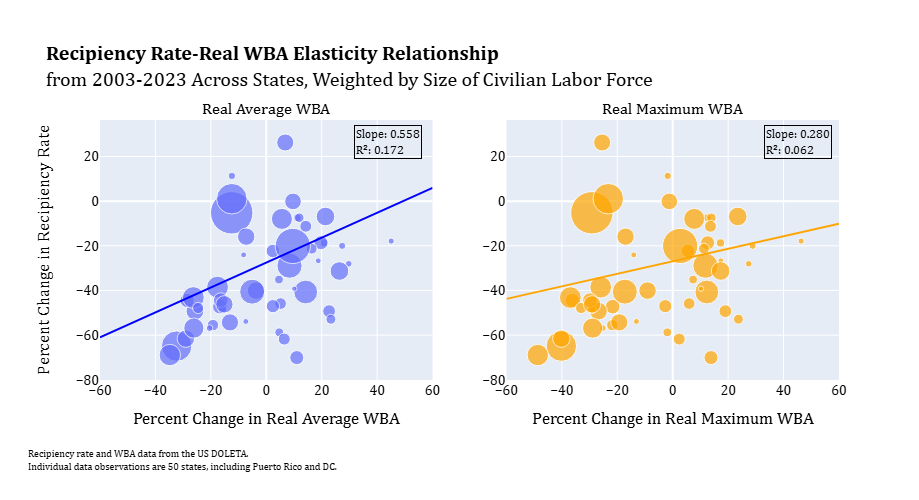

In [130]:
X = sm.add_constant(pct_changes_laborforce[['% Change in Real Maximum WBA (2003-2023)']])
y = pct_changes_laborforce['% Change in Recipiency Rate (2003-2023)']
w = pct_changes_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

x_range = np.linspace(-60, 60, 100)
x_pred = pd.DataFrame({
    'const': 1,  # matches sm.add_constant()
    X.columns[1]: x_range
})
y_pred = model.predict(x_pred)
x_pred = x_pred[f'{X.columns[1]}']

X = sm.add_constant(pct_changes_laborforce[['% Change in Real Average WBA (2003-2023)']])
y = pct_changes_laborforce['% Change in Recipiency Rate (2003-2023)']
w = pct_changes_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

x_range2 = np.linspace(-60, 60, 100)
x_pred2 = pd.DataFrame({
    'const': 1,
    X.columns[1]: x_range2
})
y_pred2 = model.predict(x_pred2)
x_pred2 = x_pred2[f'{X.columns[1]}']

fig1 = px.scatter(data_frame = pct_changes_laborforce,
                 x = '% Change in Real Average WBA (2003-2023)',
                 y = '% Change in Recipiency Rate (2003-2023)',
                 size = 'Civilian Labor Force',
                 size_max = 30,
                 hover_data = ['State'],
                 height=500)
fig1.add_trace(go.Scatter(
    x=x_pred2,
    y=y_pred2,
    mode='lines',
    line=dict(color='blue', width=2),
    opacity=1,
    showlegend=False
))

fig2 = px.scatter(data_frame = pct_changes_laborforce,
                 x = '% Change in Real Maximum WBA (2003-2023)',
                 y = '% Change in Recipiency Rate (2003-2023)',
                 size = 'Civilian Labor Force',
                 size_max = 30,
                 hover_data = ['State'],
                 height=500,
                 color_discrete_sequence=['rgba(255, 165, 0,1)'])

fig2.add_trace(go.Scatter(
    x=x_pred,
    y=y_pred,
    mode='lines',
    line=dict(color='orange', width=2),
    opacity=1,
    showlegend=False
))

fig = make_subplots(rows=1, cols=2, subplot_titles=("Real Average WBA", "Real Maximum WBA"))

# Add traces from fig1 to subplot 1
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Add traces from fig2 to subplot 2
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
    
fig.update_layout(title_text="<b>Recipiency Rate-Real WBA Elasticity Relationship</b> <br>from 2003-2023 Across States, Weighted by Size of Civilian Labor Force",
                   yaxis_title="Percent Change in Recipiency Rate",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    )
                  )

fig.update_layout(height=500)
tickvals=[-60, -40, -20, 0, 20, 40, 60]
fig.update_xaxes(title_text="Percent Change in Real Average WBA", tickvals=tickvals, row=1, col=1)
fig.update_xaxes(title_text="Percent Change in Real Maximum WBA", tickvals=tickvals, row=1, col=2)
fig.add_annotation(
    text='Recipiency rate and WBA data from the US DOLETA. <br>Individual data observations are 50 states, including Puerto Rico and DC.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.25,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.99, y=0.98,
    text=f"Slope: {slope_max:.3f}<br>R²: {r_squared_max:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.39, y=0.98,
    text=f"Slope: {slope_avg:.3f}<br>R²: {r_squared_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.update_layout(margin={"l":100,"b":120, "t":120})
fig.show()

In [132]:
write_html(fig, 'fig_6.1.html')

### Against Absolute change in recipiency

In [133]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = sm.add_constant(pct_changes_laborforce['% Change in Real Average WBA (2003-2023)'])
y = pct_changes_laborforce['Change in Recipiency Rate (2003-2023)']
w = pct_changes_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

# Summary
print(model.summary())
r_squared_avg = model.rsquared
slope_avg = model.params[1]

                                      WLS Regression Results                                     
Dep. Variable:     Change in Recipiency Rate (2003-2023)   R-squared:                       0.119
Model:                                               WLS   Adj. R-squared:                  0.102
Method:                                    Least Squares   F-statistic:                     6.780
Date:                                   Sun, 18 May 2025   Prob (F-statistic):             0.0121
Time:                                           23:07:38   Log-Likelihood:                -198.13
No. Observations:                                     52   AIC:                             400.3
Df Residuals:                                         50   BIC:                             404.2
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

In [134]:
X = sm.add_constant(pct_changes_laborforce[['% Change in Real Maximum WBA (2003-2023)']])
y = pct_changes_laborforce['Change in Recipiency Rate (2003-2023)']
w = pct_changes_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

# Summary
print(model.summary())
r_squared_max = model.rsquared
slope_max = model.params[1]

                                      WLS Regression Results                                     
Dep. Variable:     Change in Recipiency Rate (2003-2023)   R-squared:                       0.041
Model:                                               WLS   Adj. R-squared:                  0.022
Method:                                    Least Squares   F-statistic:                     2.139
Date:                                   Sun, 18 May 2025   Prob (F-statistic):              0.150
Time:                                           23:07:41   Log-Likelihood:                -200.35
No. Observations:                                     52   AIC:                             404.7
Df Residuals:                                         50   BIC:                             408.6
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

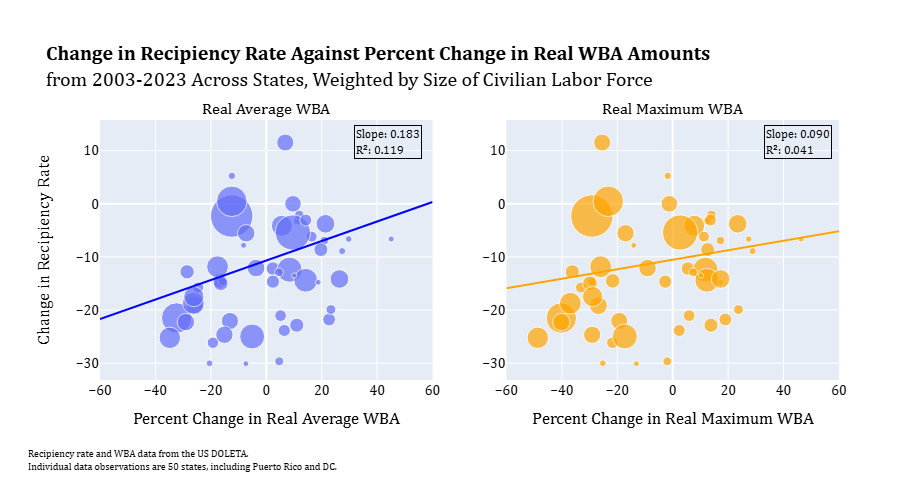

In [135]:
X = sm.add_constant(pct_changes_laborforce[['% Change in Real Maximum WBA (2003-2023)']])
y = pct_changes_laborforce['Change in Recipiency Rate (2003-2023)']
w = pct_changes_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

x_range = np.linspace(-60, 60, 100)
x_pred = pd.DataFrame({
    'const': 1,  # matches sm.add_constant()
    X.columns[1]: x_range
})
y_pred = model.predict(x_pred)
x_pred = x_pred[f'{X.columns[1]}']

X = sm.add_constant(pct_changes_laborforce[['% Change in Real Average WBA (2003-2023)']])
y = pct_changes_laborforce['Change in Recipiency Rate (2003-2023)']
w = pct_changes_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

x_range2 = np.linspace(-60, 60, 100)
x_pred2 = pd.DataFrame({
    'const': 1,
    X.columns[1]: x_range2
})
y_pred2 = model.predict(x_pred2)
x_pred2 = x_pred2[f'{X.columns[1]}']

fig1 = px.scatter(data_frame = pct_changes_laborforce,
                 x = '% Change in Real Average WBA (2003-2023)',
                 y = 'Change in Recipiency Rate (2003-2023)',
                 size = 'Civilian Labor Force',
                 size_max = 30,
                 hover_data = ['State'],
                 height=500)
fig1.add_trace(go.Scatter(
    x=x_pred2,
    y=y_pred2,
    mode='lines',
    line=dict(color='blue', width=2),
    opacity=1,
    showlegend=False
))

fig2 = px.scatter(data_frame = pct_changes_laborforce,
                 x = '% Change in Real Maximum WBA (2003-2023)',
                 y = 'Change in Recipiency Rate (2003-2023)',
                 size = 'Civilian Labor Force',
                 size_max = 30,
                 hover_data = ['State'],
                 height=500,
                 color_discrete_sequence=['rgba(255, 165, 0,1)'])

fig2.add_trace(go.Scatter(
    x=x_pred,
    y=y_pred,
    mode='lines',
    line=dict(color='orange', width=2),
    opacity=1,
    showlegend=False
))

fig = make_subplots(rows=1, cols=2, subplot_titles=("Real Average WBA", "Real Maximum WBA"))

# Add traces from fig1 to subplot 1
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Add traces from fig2 to subplot 2
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
    
fig.update_layout(title_text="<b>Change in Recipiency Rate Against Percent Change in Real WBA Amounts</b> <br>from 2003-2023 Across States, Weighted by Size of Civilian Labor Force",
                   yaxis_title="Change in Recipiency Rate",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    )
                  )

fig.update_layout(height=500)
tickvals=[-60, -40, -20, 0, 20, 40, 60]
fig.update_xaxes(title_text="Percent Change in Real Average WBA", tickvals=tickvals, row=1, col=1)
fig.update_xaxes(title_text="Percent Change in Real Maximum WBA", tickvals=tickvals, row=1, col=2)
fig.add_annotation(
    text='Recipiency rate and WBA data from the US DOLETA. <br>Individual data observations are 50 states, including Puerto Rico and DC.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.25,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.99, y=0.98,
    text=f"Slope: {slope_max:.3f}<br>R²: {r_squared_max:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.39, y=0.98,
    text=f"Slope: {slope_avg:.3f}<br>R²: {r_squared_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.update_layout(margin={"l":100,"b":120, "t":120})
fig.show()

In [136]:
write_html(fig, 'fig_6.2.html')

### Using State CPI Real Values

In [100]:
percent_changes_state = pd.read_csv('percent_changes_state.csv')

In [103]:
pct_changes_state_laborforce = percent_changes_state.merge(avg_laborforce, on="State", how='left')
pct_changes_state_laborforce = pct_changes_state_laborforce.rename(columns={'Civilian Labor Force(000)': 'Civilian Labor Force'})
pct_changes_state_laborforce.head()

,Unnamed: 0,State,Change in Recipiency Rate (2000-2017),% Change in Recipiency Rate (2000-2017),Change in Real Average WBA (2000-2017),Change in Real Maximum WBA (2000-2017),% Change in Real Average WBA (2000-2017),% Change in Real Maximum WBA (2000-2017),% Change in Real Minimum WBA (2000-2017),Change in Recipiency Rate (2001-2017),...,% Change in Real Maximum WBA (2013-2017),% Change in Real Minimum WBA (2013-2017),Change in Recipiency Rate (2014-2017),% Change in Recipiency Rate (2014-2017),Change in Real Average WBA (2014-2017),Change in Real Maximum WBA (2014-2017),% Change in Real Average WBA (2014-2017),% Change in Real Maximum WBA (2014-2017),% Change in Real Minimum WBA (2014-2017),Civilian Labor Force
0,0,AK,-24.848761,-40.815971,0.23,-4.52,0.136450,-1.822581,-16.250,-24.410296,...,-7.182068,-7.178841,-7.337538,-16.918944,4.43,-8.91,2.695303,-3.530251,-3.534031,354655.0
1,1,AL,-11.015258,-37.712424,-9.63,-8.21,-5.867300,-4.321053,-31.400,-16.623901,...,-2.499330,-2.495262,-0.999319,-5.206788,3.81,-2.14,2.528370,-1.163486,-1.152738,2196500.0
2,2,AR,-17.373236,-38.312760,2.64,38.27,1.248227,12.385113,13.400,-29.677472,...,-3.337416,-3.332300,-2.801736,-9.104135,-21.87,-13.26,-9.266557,-3.677919,-3.675676,1342190.0
3,4,CA,-2.884023,-7.037787,57.68,68.27,35.245952,29.682609,-33.725,-8.416246,...,-6.342827,-6.358177,7.318541,23.779598,2.87,-16.01,1.313742,-5.094184,-5.118110,18515964.0
4,5,CO,6.882470,29.420274,7.45,-16.51,2.876226,-4.899110,-37.880,0.541759,...,5.486801,-4.723926,5.043847,19.989682,26.85,15.44,11.205242,5.061465,-2.018927,2840452.0


In [137]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = sm.add_constant(pct_changes_state_laborforce['% Change in Real Average WBA (2003-2017)'])
y = pct_changes_state_laborforce['Change in Recipiency Rate (2003-2017)']
w = pct_changes_state_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

# Summary
print(model.summary())
r_squared_avg = model.rsquared
slope_avg = model.params[1]

x_range2 = np.linspace(-60, 60, 100)
x_pred2 = pd.DataFrame({
    'const': 1,
    X.columns[1]: x_range2
})
y_pred2 = model.predict(x_pred2)
x_pred2 = x_pred2[f'{X.columns[1]}']

                                      WLS Regression Results                                     
Dep. Variable:     Change in Recipiency Rate (2003-2017)   R-squared:                       0.224
Model:                                               WLS   Adj. R-squared:                  0.199
Method:                                    Least Squares   F-statistic:                     8.951
Date:                                   Sun, 18 May 2025   Prob (F-statistic):            0.00540
Time:                                           23:08:27   Log-Likelihood:                -113.41
No. Observations:                                     33   AIC:                             230.8
Df Residuals:                                         31   BIC:                             233.8
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

In [138]:
X = sm.add_constant(pct_changes_state_laborforce['% Change in Real Maximum WBA (2003-2017)'])
y = pct_changes_state_laborforce['Change in Recipiency Rate (2003-2017)']
w = pct_changes_state_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

# Summary
print(model.summary())
r_squared_max = model.rsquared
slope_max = model.params[1]

x_range = np.linspace(-60, 60, 100)
x_pred = pd.DataFrame({
    'const': 1,  # matches sm.add_constant()
    X.columns[1]: x_range
})
y_pred = model.predict(x_pred)
x_pred = x_pred[f'{X.columns[1]}']

                                      WLS Regression Results                                     
Dep. Variable:     Change in Recipiency Rate (2003-2017)   R-squared:                       0.136
Model:                                               WLS   Adj. R-squared:                  0.108
Method:                                    Least Squares   F-statistic:                     4.889
Date:                                   Sun, 18 May 2025   Prob (F-statistic):             0.0345
Time:                                           23:08:28   Log-Likelihood:                -115.18
No. Observations:                                     33   AIC:                             234.4
Df Residuals:                                         31   BIC:                             237.4
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

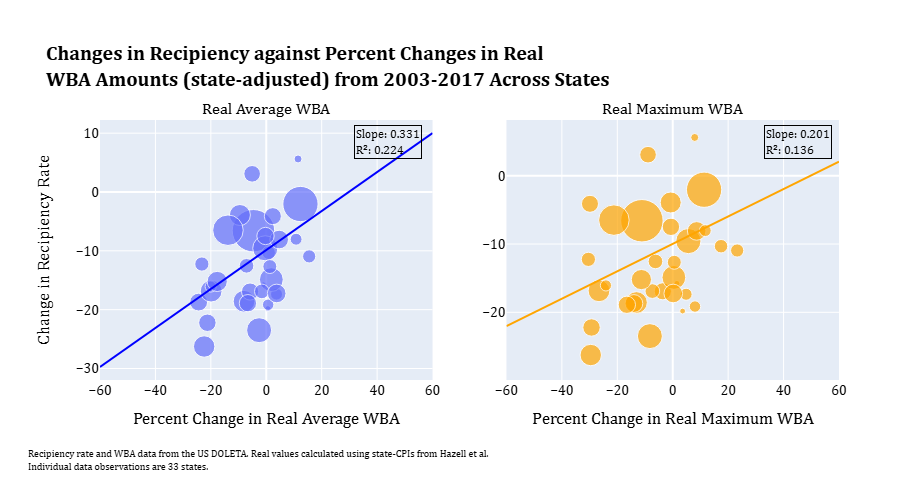

In [139]:
fig1 = px.scatter(data_frame = pct_changes_state_laborforce,
                 x = '% Change in Real Average WBA (2003-2017)',
                 y = 'Change in Recipiency Rate (2003-2017)',
                 size = 'Civilian Labor Force',
                 size_max = 30,
                 hover_data = ['State'],
                 height=500)
fig1.add_trace(go.Scatter(
    x=x_pred2,
    y=y_pred2,
    mode='lines',
    line=dict(color='blue', width=2),
    opacity=1,
    showlegend=False
))

fig2 = px.scatter(data_frame = pct_changes_state_laborforce,
                 x = '% Change in Real Maximum WBA (2003-2017)',
                 y = 'Change in Recipiency Rate (2003-2017)',
                 size = 'Civilian Labor Force',
                 size_max = 30,
                 hover_data = ['State'],
                 height=500,
                 color_discrete_sequence=['rgba(255, 165, 0,1)'])

fig2.add_trace(go.Scatter(
    x=x_pred,
    y=y_pred,
    mode='lines',
    line=dict(color='orange', width=2),
    opacity=1,
    showlegend=False
))

fig = make_subplots(rows=1, cols=2, subplot_titles=("Real Average WBA", "Real Maximum WBA"))

# Add traces from fig1 to subplot 1
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Add traces from fig2 to subplot 2
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
    
fig.update_layout(title_text="<b>Changes in Recipiency against Percent Changes in Real <br>WBA Amounts (state-adjusted) from 2003-2017 Across States",
                   yaxis_title="Change in Recipiency Rate",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    )
                  )

fig.update_layout(height=500)
tickvals=[-60, -40, -20, 0, 20, 40, 60]
fig.update_xaxes(title_text="Percent Change in Real Average WBA", tickvals=tickvals, row=1, col=1)
fig.update_xaxes(title_text="Percent Change in Real Maximum WBA", tickvals=tickvals, row=1, col=2)
fig.add_annotation(
    text='Recipiency rate and WBA data from the US DOLETA. Real values calculated using state-CPIs from Hazell et al. <br>Individual data observations are 33 states.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.25,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.99, y=0.98,
    text=f"Slope: {slope_max:.3f}<br>R²: {r_squared_max:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.39, y=0.98,
    text=f"Slope: {slope_avg:.3f}<br>R²: {r_squared_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.update_layout(margin={"l":100,"b":120, "t":120})
fig.show()

In [140]:
write_html(fig, 'fig_6.3.html')

### Elasticity Type Relationship (state CPIs)

In [141]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = sm.add_constant(pct_changes_state_laborforce['% Change in Real Average WBA (2003-2017)'])
y = pct_changes_state_laborforce['% Change in Recipiency Rate (2003-2017)']
w = pct_changes_state_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

# Summary
print(model.summary())
r_squared_avg = model.rsquared
slope_avg = model.params[1]

x_range2 = np.linspace(-60, 60, 100)
x_pred2 = pd.DataFrame({
    'const': 1,
    X.columns[1]: x_range2
})
y_pred2 = model.predict(x_pred2)
x_pred2 = x_pred2[f'{X.columns[1]}']

                                       WLS Regression Results                                      
Dep. Variable:     % Change in Recipiency Rate (2003-2017)   R-squared:                       0.262
Model:                                                 WLS   Adj. R-squared:                  0.238
Method:                                      Least Squares   F-statistic:                     10.99
Date:                                     Sun, 18 May 2025   Prob (F-statistic):            0.00234
Time:                                             23:09:00   Log-Likelihood:                -144.51
No. Observations:                                       33   AIC:                             293.0
Df Residuals:                                           31   BIC:                             296.0
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


In [142]:
X = sm.add_constant(pct_changes_state_laborforce['% Change in Real Maximum WBA (2003-2017)'])
y = pct_changes_state_laborforce['% Change in Recipiency Rate (2003-2017)']
w = pct_changes_state_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

# Summary
print(model.summary())
r_squared_max = model.rsquared
slope_max = model.params[1]

x_range = np.linspace(-60, 60, 100)
x_pred = pd.DataFrame({
    'const': 1,  # matches sm.add_constant()
    X.columns[1]: x_range
})
y_pred = model.predict(x_pred)
x_pred = x_pred[f'{X.columns[1]}']

                                       WLS Regression Results                                      
Dep. Variable:     % Change in Recipiency Rate (2003-2017)   R-squared:                       0.146
Model:                                                 WLS   Adj. R-squared:                  0.119
Method:                                      Least Squares   F-statistic:                     5.319
Date:                                     Sun, 18 May 2025   Prob (F-statistic):             0.0279
Time:                                             23:09:02   Log-Likelihood:                -146.90
No. Observations:                                       33   AIC:                             297.8
Df Residuals:                                           31   BIC:                             300.8
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


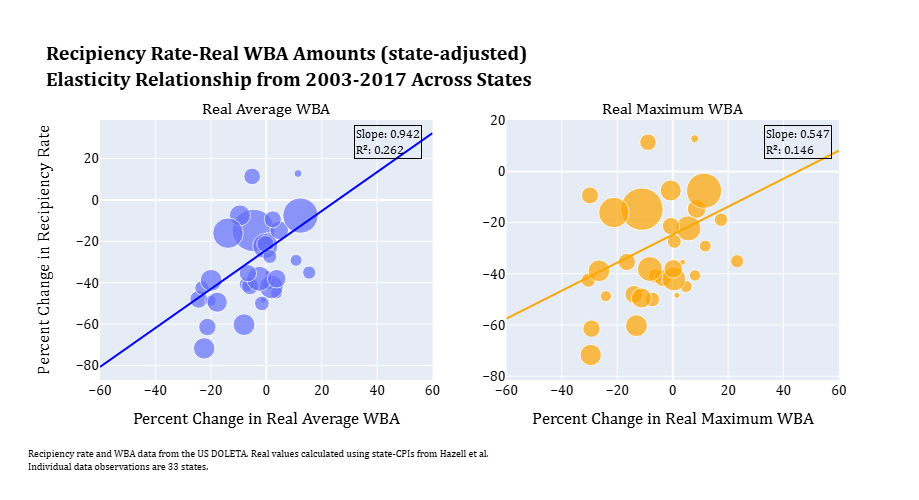

In [143]:
fig1 = px.scatter(data_frame = pct_changes_state_laborforce,
                 x = '% Change in Real Average WBA (2003-2017)',
                 y = '% Change in Recipiency Rate (2003-2017)',
                 size = 'Civilian Labor Force',
                 size_max = 30,
                 hover_data = ['State'],
                 height=500)
fig1.add_trace(go.Scatter(
    x=x_pred2,
    y=y_pred2,
    mode='lines',
    line=dict(color='blue', width=2),
    opacity=1,
    showlegend=False
))

fig2 = px.scatter(data_frame = pct_changes_state_laborforce,
                 x = '% Change in Real Maximum WBA (2003-2017)',
                 y = '% Change in Recipiency Rate (2003-2017)',
                 size = 'Civilian Labor Force',
                 size_max = 30,
                 hover_data = ['State'],
                 height=500,
                 color_discrete_sequence=['rgba(255, 165, 0,1)'])

fig2.add_trace(go.Scatter(
    x=x_pred,
    y=y_pred,
    mode='lines',
    line=dict(color='orange', width=2),
    opacity=1,
    showlegend=False
))

fig = make_subplots(rows=1, cols=2, subplot_titles=("Real Average WBA", "Real Maximum WBA"))

# Add traces from fig1 to subplot 1
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Add traces from fig2 to subplot 2
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
    
fig.update_layout(title_text="<b>Recipiency Rate-Real WBA Amounts (state-adjusted) <br>Elasticity Relationship from 2003-2017 Across States",
                   yaxis_title="Percent Change in Recipiency Rate",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    )
                  )

fig.update_layout(height=500)
tickvals=[-60, -40, -20, 0, 20, 40, 60]
fig.update_xaxes(title_text="Percent Change in Real Average WBA", tickvals=tickvals, row=1, col=1)
fig.update_xaxes(title_text="Percent Change in Real Maximum WBA", tickvals=tickvals, row=1, col=2)
fig.add_annotation(
    text='Recipiency rate and WBA data from the US DOLETA. Real values calculated using state-CPIs from Hazell et al. <br>Individual data observations are 33 states.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.25,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.99, y=0.98,
    text=f"Slope: {slope_max:.3f}<br>R²: {r_squared_max:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.39, y=0.98,
    text=f"Slope: {slope_avg:.3f}<br>R²: {r_squared_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.update_layout(margin={"l":100,"b":120, "t":120})
fig.show()

In [144]:
write_html(fig, 'fig_6.4.html')